In [1]:
#All the Libraries used
import os
import torch.nn as nn

from fastai.vision.all import *
from fastai.vision import *
from PIL import Image

import pandas as pd

In [ ]:
!unrar x /content/drive/MyDrive/fastai.rar

Streaming output truncated to the last 5000 lines.
Extracting  fastai/train/River/River_1451.jpg                             93%  OK 
Extracting  fastai/train/River/River_1452.jpg                             93%  OK 
Extracting  fastai/train/River/River_1453.jpg                             93%  OK 
Extracting  fastai/train/River/River_1454.jpg                             93%  OK 
Extracting  fastai/train/River/River_1455.jpg                             93%  OK 
Extracting  fastai/train/River/River_1456.jpg                             93%  OK 
Extracting  fastai/train/River/River_1457.jpg                             93%  OK 
Extracting  fastai/train/River/River_1458.jpg                             93%  OK 
Extracting  fastai/train/River/River_1459.jpg                             93%  OK 
Extracting  fastai/train/River/River_146.jpg                              93%  OK 
Extracting  fastai/train/Rive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATASET_PATH = 'train'

In [3]:
#Classes used in the model
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [4]:
class_names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'models',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [5]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name=class_names[i]
    image_names=os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [6]:
#Defining DataFrame
df = pd.DataFrame(
{
    'name': image_paths,
    'label': labels
})

In [7]:
df.head()

,name,label
0,train/AnnualCrop/AnnualCrop_1.jpg,0
1,train/AnnualCrop/AnnualCrop_10.jpg,0
2,train/AnnualCrop/AnnualCrop_100.jpg,0
3,train/AnnualCrop/AnnualCrop_1000.jpg,0
4,train/AnnualCrop/AnnualCrop_1001.jpg,0


In [8]:
df.tail()

,name,label
26807,train/SeaLake/SeaLake_995.jpg,10
26808,train/SeaLake/SeaLake_996.jpg,10
26809,train/SeaLake/SeaLake_997.jpg,10
26810,train/SeaLake/SeaLake_998.jpg,10
26811,train/SeaLake/SeaLake_999.jpg,10


In [9]:
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)

**Defining DataLoader with Preprocess Parameters**

In [10]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(64),
    bs=32,
    batch_tfms=[Normalize.from_stats(*imagenet_stats),RandTransform()],
    valid_pct=0.2,
    seed=45,
    shuffle=True,
    flip_vert=True,
    max_zoom=1.2
)

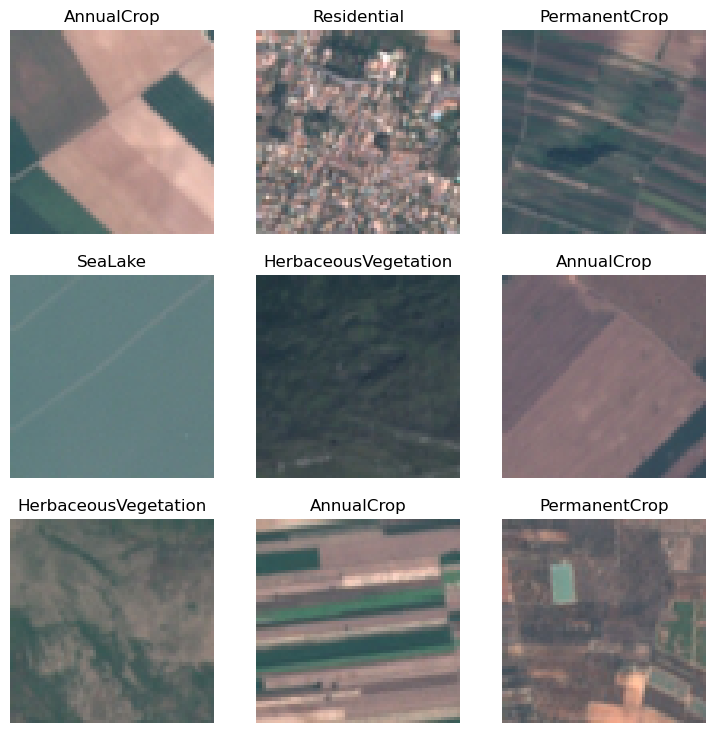

In [11]:
dls.show_batch()

**Create a model with ResNet34 architecture with ROCAuc and Accuracy as Metrics**

In [13]:
model = vision_learner(
    dls=dls,
    arch=models.resnet34,
    metrics=[accuracy, RocAuc(multi_class='ovr')]
)


E:\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


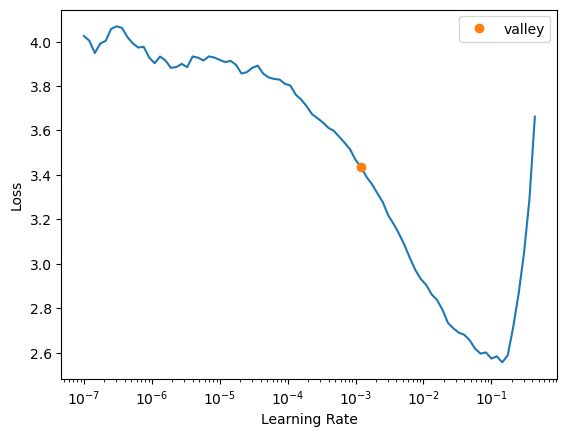

In [14]:
lr1=model.lr_find()

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.491934,0.276661,0.913465,0.994488,05:03
1,0.270660,0.158324,0.947035,0.997974,04:17
2,0.222708,0.126181,0.957106,0.998624,04:16
3,0.149553,0.106188,0.962141,0.998870,04:17
4,0.151169,0.108755,0.964565,0.998811,04:22


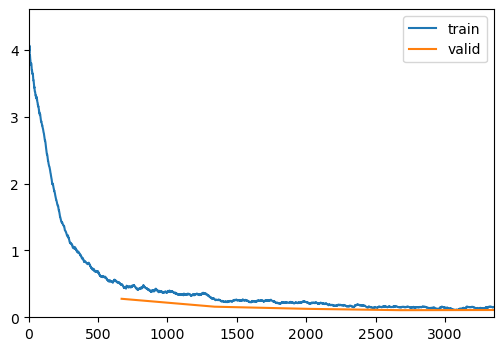

In [15]:
#Training Model with fit_one_cycle
model.fit_one_cycle(5,lr1,cbs=[ShowGraphCallback()])

In [16]:
#Unfreezing the Model
model.unfreeze()

In [17]:
model.summary()

Sequential (Input shape: 32 x 3 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 32 x 32   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                        

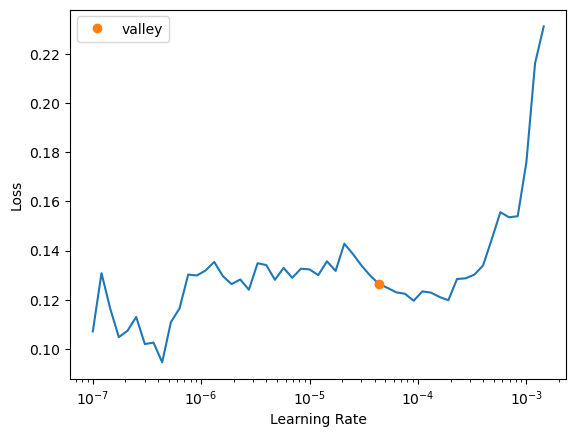

In [18]:
#Finding Learning Rate
lr2=model.lr_find()

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.158741,0.109125,0.967363,0.998890,13:11
1,0.146939,0.107286,0.966057,0.998888,13:07
2,0.086299,0.090048,0.969601,0.999250,14:00
3,0.029801,0.086072,0.973890,0.999306,13:46
4,0.019136,0.080458,0.975382,0.999374,13:35


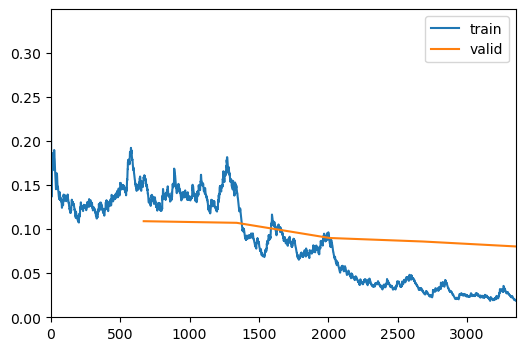

In [19]:
#Traning unfreeze model with fit_one_cycle
model.fit_one_cycle(5,lr2,cbs=[ShowGraphCallback()])

In [20]:
model.export('pretrained.pkl')

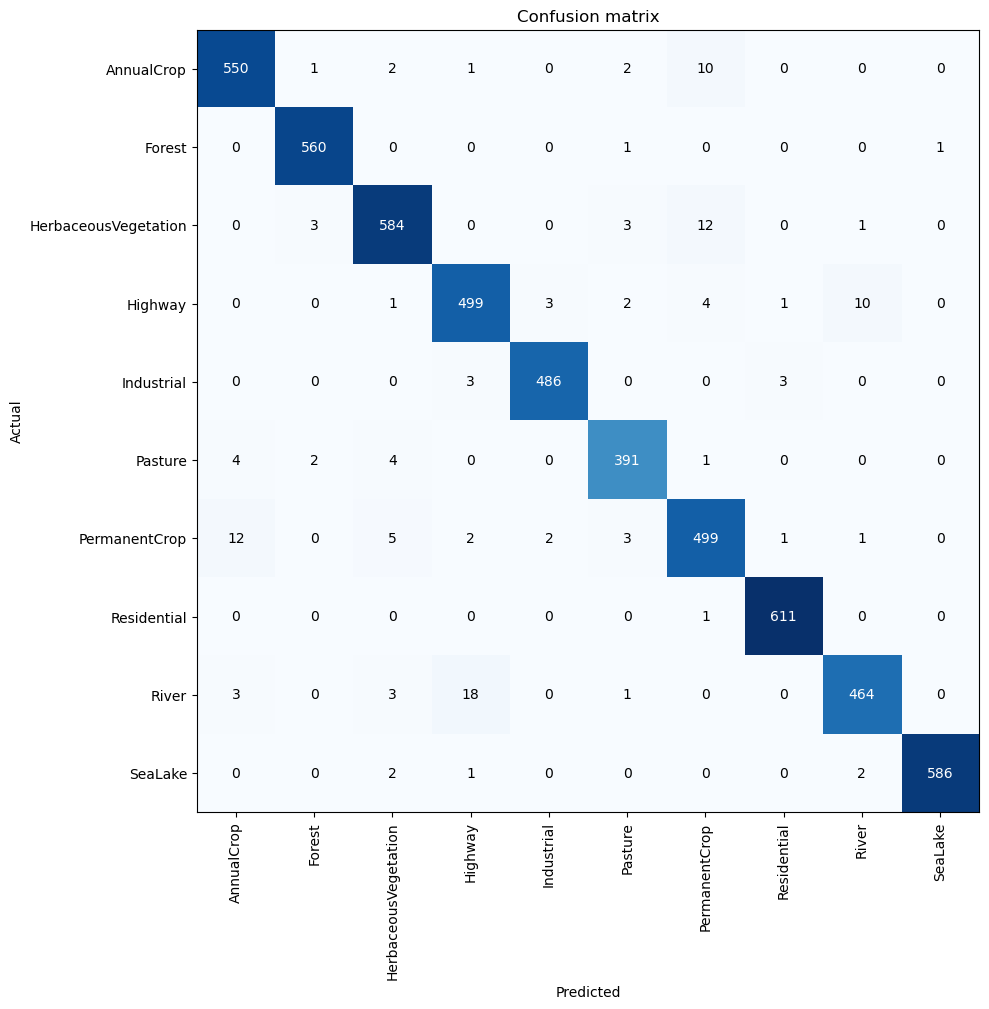

In [21]:
#Confusion Matrix
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(15,10))

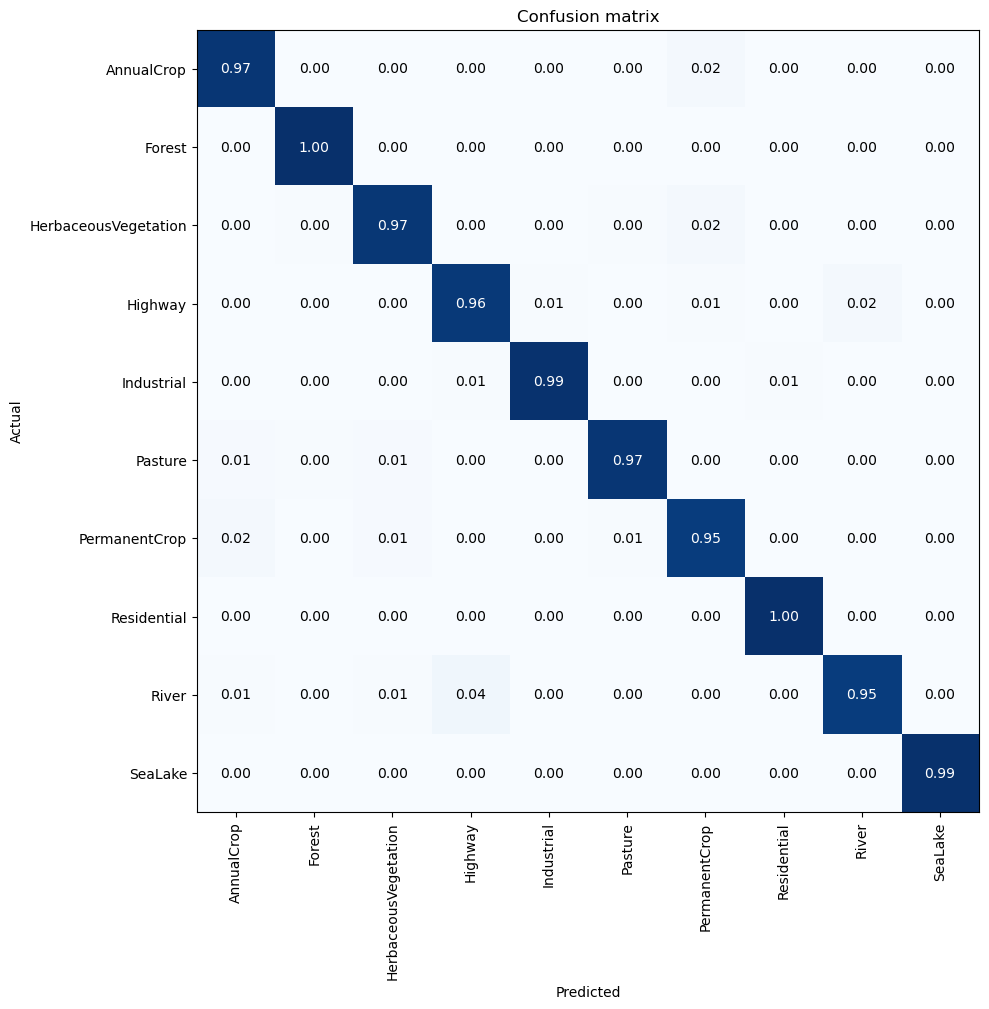

In [22]:
#Normalized Confusion Matrix
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(15,10),normalize=True)

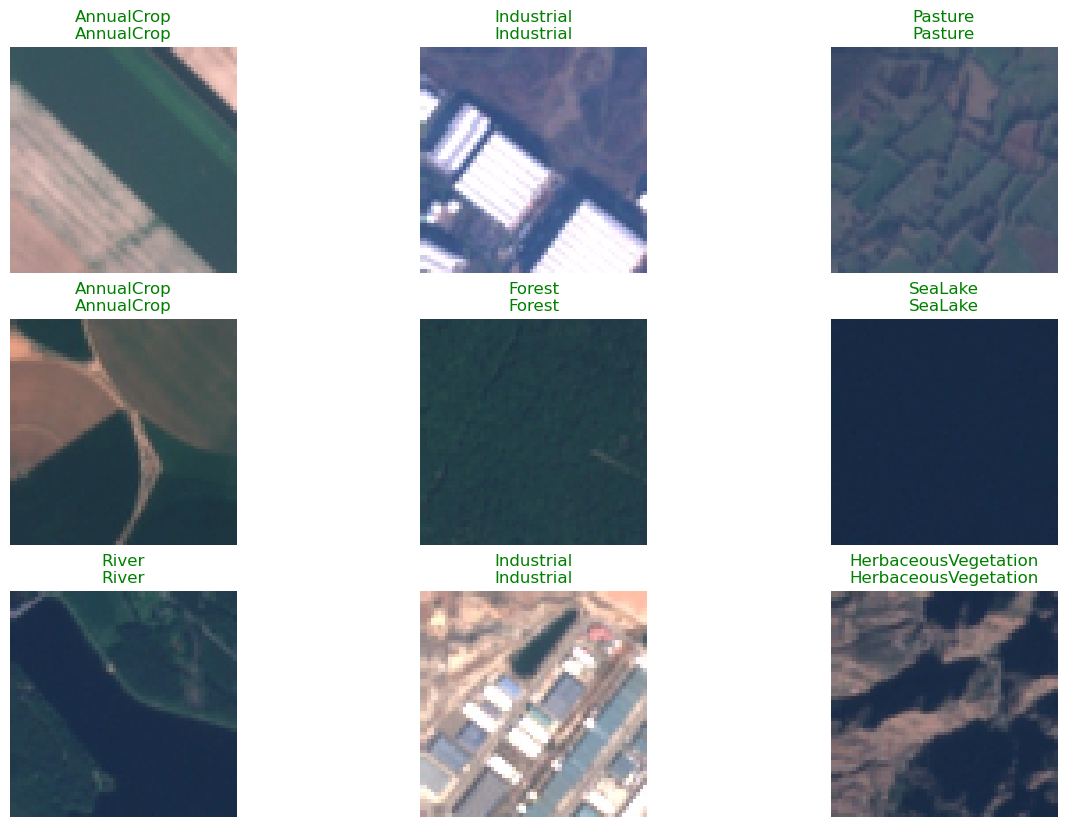

In [23]:
model.show_results(figsize=(15,10))

**Export the model**

In [ ]:
model.export('deforestation_classifier.pkl')

**Load the model**

In [ ]:
new_model=load_learner(f'deforestation_classifier.pkl')

**Predict from the loaded model**

('River',
 TensorBase(8),
 TensorBase([8.6445e-03, 5.1836e-04, 8.3702e-04, 4.1533e-02, 2.1397e-05,
             1.4360e-05, 1.9134e-05, 1.3755e-04, 9.4723e-01, 1.0495e-03]))

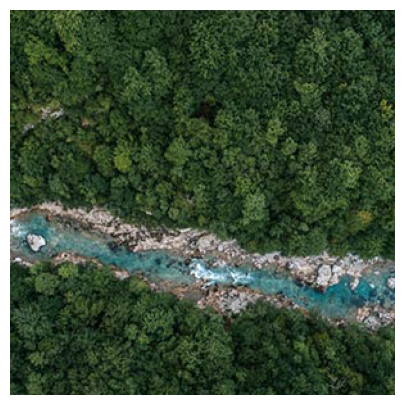

In [26]:
img_fn = '3.jpg'
img = PILImage.create(img_fn)
img.show(figsize=(5,5))

model.predict(
    item=img_fn
)

In [33]:
preds,y, loss = model.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.9753823280334473 %.


In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

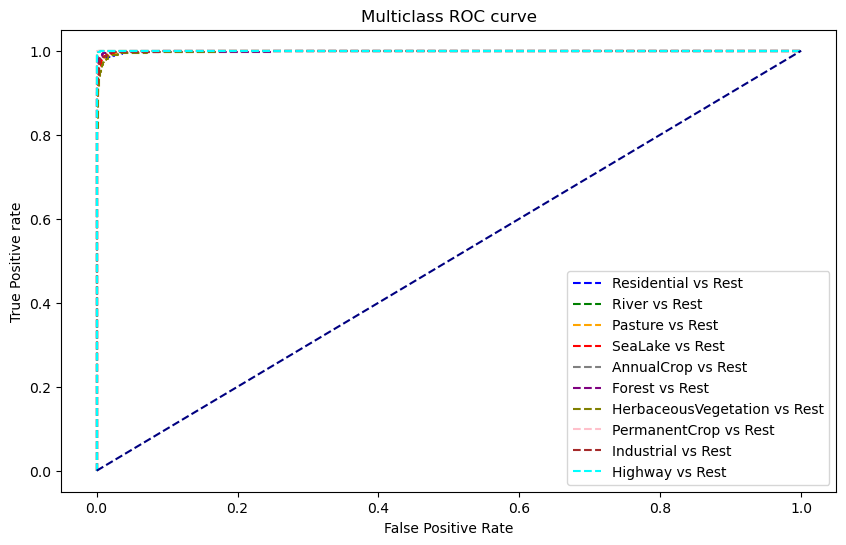

In [36]:
#ROC Curve OVR
fpr = {}
tpr = {}
thresh ={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y, preds[:,i], pos_label=i)
    
# plotting
plt.figure(figsize=(10,6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Residential vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='River vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Pasture vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='SeaLake vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='gray', label='AnnualCrop vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Forest vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='olive', label='HerbaceousVegetation vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='PermanentCrop vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='brown', label='Industrial vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='cyan', label='Highway vs Rest')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);